# Chapter 8: CNNs, RNNs, LSTMs, and Transformers

This notebook explores specialized neural network architectures designed for specific data types and tasks:

1. **Convolutional Neural Networks (CNNs)** for image data
2. **Recurrent Neural Networks (RNNs)** for sequential data
3. **Long Short-Term Memory (LSTM)** networks for complex sequence tasks
4. **Transformers** for advanced natural language processing and sequence modeling

Each architecture is explained, implemented, and applied to appropriate tasks to demonstrate its capabilities.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input, GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist, fashion_mnist, imdb

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Configure visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.18.0


## Part 1: Convolutional Neural Networks (CNNs)

Convolutional Neural Networks are specialized neural networks designed for processing grid-like data such as images. They use convolutional layers to automatically learn spatial hierarchies of features from input data.

### 1.1 Introduction to CNNs

#### Key Components of CNNs:

1. **Convolutional Layers**: Apply filters to input data to extract features
2. **Pooling Layers**: Reduce spatial dimensions and extract dominant features
3. **Fully Connected Layers**: Perform classification based on extracted features

#### Advantages of CNNs:

- Parameter sharing: The same filter is applied to different parts of the input
- Translation invariance: Can recognize patterns regardless of their position
- Hierarchical feature learning: Automatically learn from low-level to high-level features

Let's implement a CNN for the classic MNIST handwritten digit recognition task.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset information
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Min pixel value: {X_train.min()}, Max pixel value: {X_train.max()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)
Min pixel value: 0, Max pixel value: 255


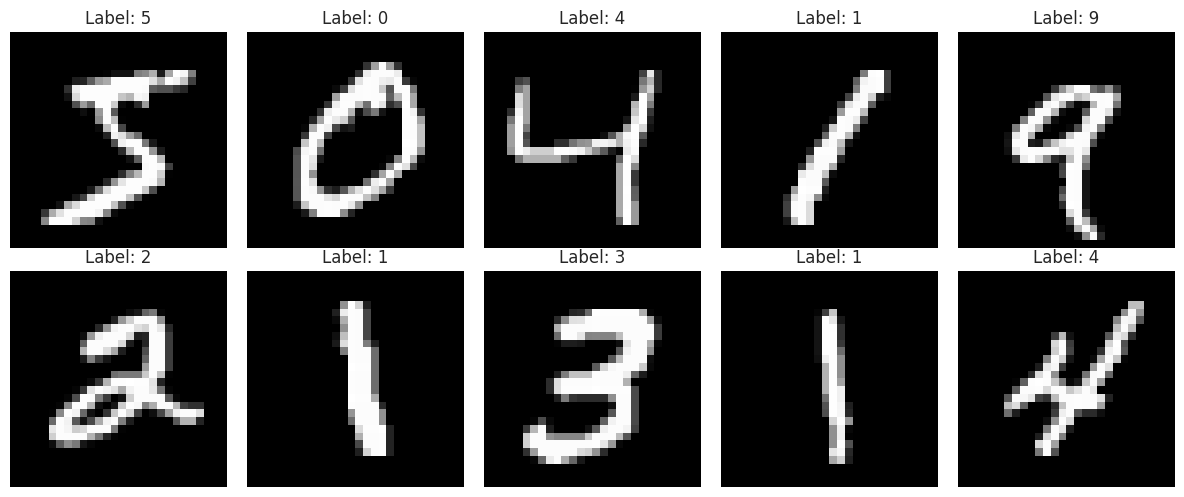

In [3]:
# Visualize some sample images
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
# Preprocess the data
# 1. Normalize pixel values to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 2. Reshape images to include channel dimension (1 for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# 3. Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

print(f"Processed training data shape: {X_train.shape}")
print(f"Processed training labels shape: {y_train_one_hot.shape}")

Processed training data shape: (60000, 28, 28, 1)
Processed training labels shape: (60000, 10)


In [5]:
# Define a simple CNN model
def create_simple_cnn(input_shape, num_classes):
    model = Sequential([
        # First convolutional block
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Second convolutional block
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Flatten and fully connected layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

# Create the model
cnn_model = create_simple_cnn(input_shape=(28, 28, 1), num_classes=10)

# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,818 (1.78 MB)

 Trainable params: 467,818 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Set up callbacks for training
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
cnn_history = cnn_model.fit(
    X_train, y_train_one_hot,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.7801 - loss: 0.6600 - val_accuracy: 0.9858 - val_loss: 0.0462 - learning_rate: 0.0010
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9689 - loss: 0.1049 - val_accuracy: 0.9892 - val_loss: 0.0376 - learning_rate: 0.0010
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9785 - loss: 0.0711 - val_accuracy: 0.9900 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9828 - loss: 0.0596 - val_accuracy: 0.9915 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9874 - loss: 0.0457 - val_accuracy: 0.9922 - val_loss: 0.0291 - learning_rate: 0.0010
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9870 - loss: 0.0417 - val_accuracy: 0.9920 - val_loss: 0.0251 - learning_rate: 0.0010
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9891 - loss: 0.0369 

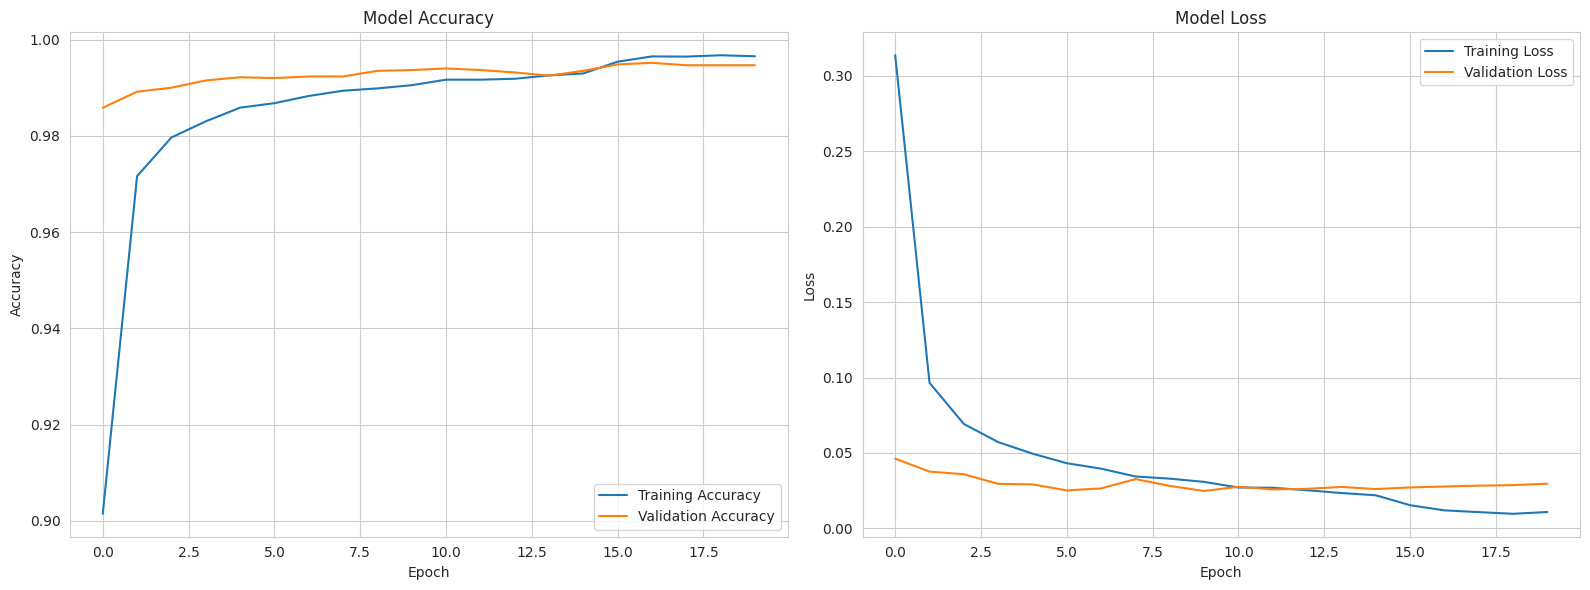

In [7]:
# Plot training history
plt.figure(figsize=(16, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Test accuracy: 0.9952
Test loss: 0.0164
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



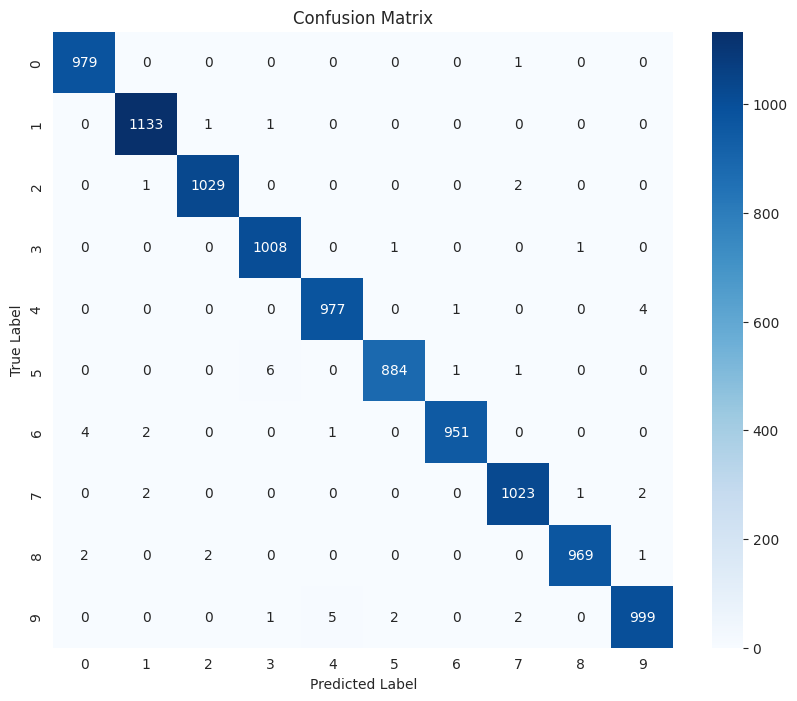

In [8]:
# Evaluate the model on the test set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test accuracy: {cnn_test_acc:.4f}")
print(f"Test loss: {cnn_test_loss:.4f}")

# Make predictions
y_pred_prob = cnn_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

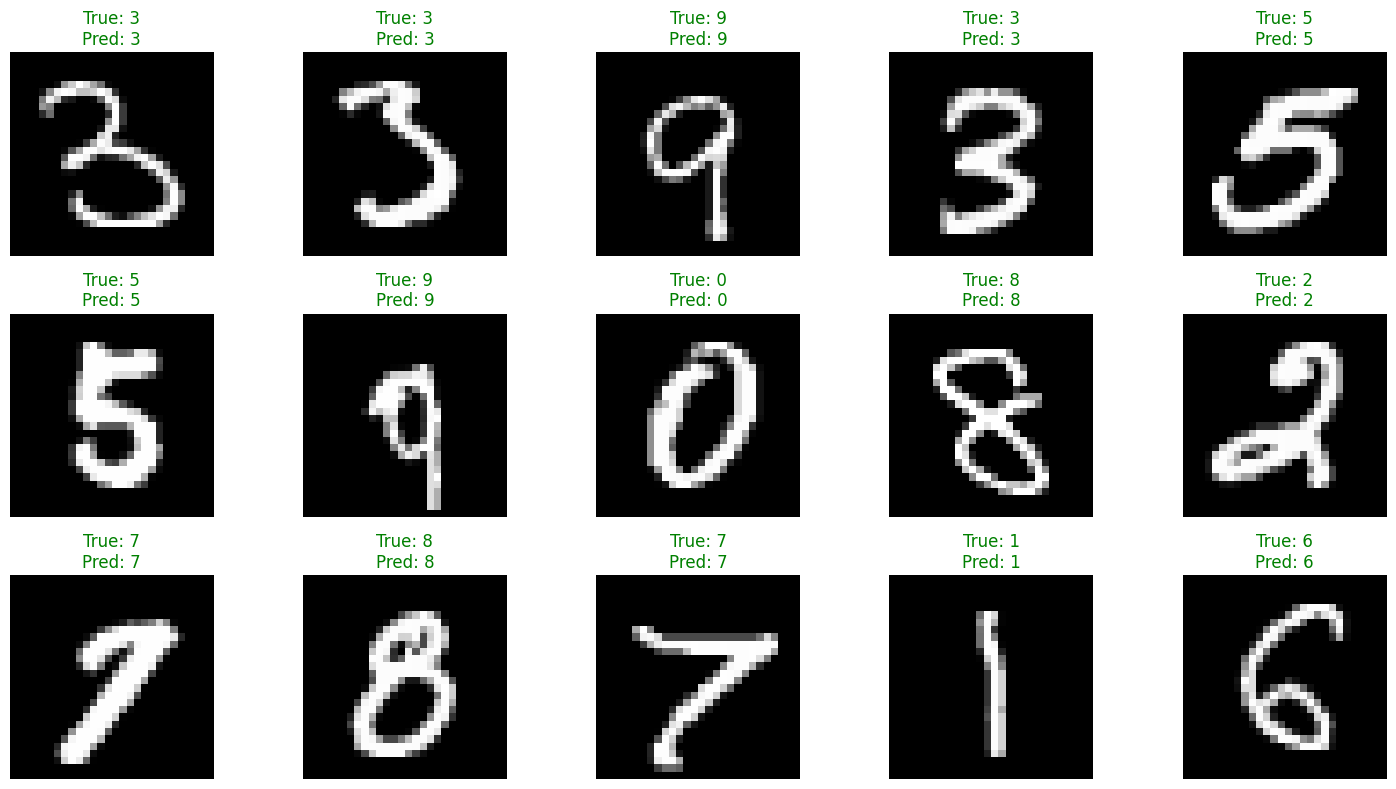

In [9]:
# Visualize predictions
n_images = 15
sample_indices = np.random.choice(len(X_test), n_images, replace=False)

plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')

    true_label = y_test[idx]
    pred_label = y_pred[idx]

    color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

### 1.2 Data Augmentation

Data augmentation is a technique to artificially expand the training dataset by creating modified versions of the existing data through various transformations. This helps improve model generalization and prevents overfitting.

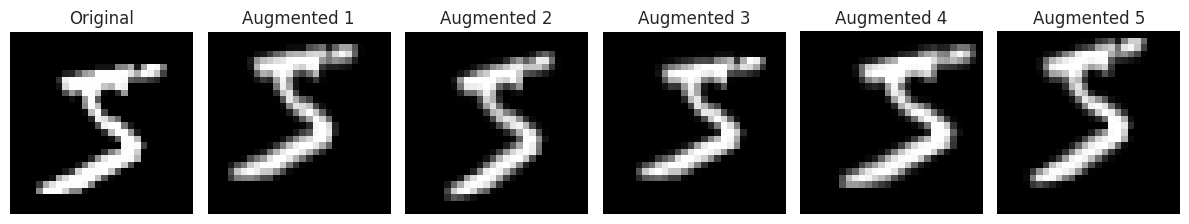

In [11]:
# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10%
    zoom_range=0.1,          # Randomly zoom images by up to 10%
    shear_range=0.1,         # Randomly apply shearing transformations
    fill_mode='nearest'      # Strategy for filling in newly created pixels
)

# Apply data augmentation to a sample image
sample_img = X_train[0].reshape(1, 28, 28, 1)  # Select a single image

# Display the original and augmented images
plt.figure(figsize=(12, 5))
plt.subplot(1, 6, 1)
plt.imshow(sample_img[0, :, :, 0], cmap='gray')
plt.title("Original")
plt.axis('off')

# Generate and display 5 augmented images
i = 2
for batch in datagen.flow(sample_img, batch_size=1):
    plt.subplot(1, 6, i)
    plt.imshow(batch[0, :, :, 0], cmap='gray')
    plt.title(f"Augmented {i-1}")
    plt.axis('off')
    i += 1
    if i > 6:  # Display 5 augmented images
        break

plt.tight_layout()
plt.show()

In [12]:
# Create a new CNN model for training with augmentation
cnn_model_aug = create_simple_cnn(input_shape=(28, 28, 1), num_classes=10)

# Compile the model
cnn_model_aug.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set up the data augmentation pipeline
datagen.fit(X_train)

# Set up callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model with data augmentation
cnn_aug_history = cnn_model_aug.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=128),
    steps_per_epoch=len(X_train) // 128,
    epochs=20,
    validation_data=(X_test, y_test_one_hot),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - accuracy: 0.7011 - loss: 0.8707 - val_accuracy: 0.9829 - val_loss: 0.0555 - learning_rate: 0.0010
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9531 - loss: 0.1557 - val_accuracy: 0.9837 - val_loss: 0.0518 - learning_rate: 0.0010
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9473 - loss: 0.1744 - val_accuracy: 0.9889 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0956 - val_accuracy: 0.9893 - val_loss: 0.0338 - learning_rate: 0.0010
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.9635 - loss: 0.1260 - val_accuracy: 0.9911 - val_loss: 0.0232 - learning_rate: 0.0010
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9922 - loss: 0.0415 - val_accuracy: 0.9906 - val_loss: 0.0239 - learning_rate: 0.0010
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9723 - loss: 0

In [13]:
# Evaluate the model with data augmentation
aug_test_loss, aug_test_acc = cnn_model_aug.evaluate(X_test, y_test_one_hot, verbose=0)
print(f"Test accuracy (with augmentation): {aug_test_acc:.4f}")
print(f"Test loss (with augmentation): {aug_test_loss:.4f}")

# Compare with the original model
print(f"\nOriginal model test accuracy: {cnn_test_acc:.4f}")
print(f"Improvement with augmentation: {(aug_test_acc - cnn_test_acc)*100:.2f}%")

Test accuracy (with augmentation): 0.9957
Test loss (with augmentation): 0.0120

Original model test accuracy: 0.9952
Improvement with augmentation: 0.05%


## Part 2: Recurrent Neural Networks (RNNs)

Recurrent Neural Networks are specialized neural networks designed for sequential data. Unlike feedforward networks, RNNs have connections that form cycles, allowing them to maintain a "memory" of previous inputs.

### 2.1 Introduction to RNNs

#### Key Characteristics of RNNs:

1. **Sequential Processing**: Process inputs one element at a time, maintaining a hidden state
2. **Parameter Sharing**: Use the same weights across all time steps
3. **Memory**: Ability to retain information from previous time steps

#### Limitations of Simple RNNs:

- Vanishing and exploding gradients: Difficulty learning long-range dependencies
- Limited memory capacity: Struggle to remember information for long sequences

Let's implement a simple RNN for a binary text classification task using the IMDB movie review dataset.

In [14]:
# Load the IMDB dataset (sentiment analysis)
# This dataset contains movie reviews labeled as positive (1) or negative (0)
max_features = 10000  # Number of words in the vocabulary
maxlen = 200  # Maximum sequence length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Display dataset information
print(f"Training data shape: {len(X_train)}")
print(f"Test data shape: {len(X_test)}")
print(f"Sample label: {y_train[0]} ({('Negative', 'Positive')[y_train[0]]})")
print(f"Sample review (word indices): {X_train[0][:10]}...")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: 25000
Test data shape: 25000
Sample label: 1 (Positive)
Sample review (word indices): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]...


In [15]:
# Preprocess the data
# 1. Pad sequences to a fixed length
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

print(f"Padded training data shape: {X_train.shape}")
print(f"Padded test data shape: {X_test.shape}")
print(f"Sample padded sequence: {X_train[0][:10]}...")

Padded training data shape: (25000, 200)
Padded test data shape: (25000, 200)
Sample padded sequence: [  5  25 100  43 838 112  50 670   2   9]...


In [16]:
# Helper function to get word index mapping
def get_word_index():
    word_index = imdb.get_word_index()
    # Shift index by 3 because 0, 1, 2 are reserved indices
    word_index = {k: (v + 3) for k, v in word_index.items()}
    word_index["<PAD>"] = 0
    word_index["<START>"] = 1
    word_index["<UNK>"] = 2
    word_index["<UNUSED>"] = 3

    # Create reverse mapping
    reverse_word_index = {v: k for k, v in word_index.items()}
    return word_index, reverse_word_index

# Function to decode a review
def decode_review(encoded_review):
    _, reverse_word_index = get_word_index()
    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review if i > 0])

# Display a sample review in human-readable form
sample_review = decode_review(X_train[0])
print(f"Sample review: {sample_review[:200]}...")
print(f"Label: {('Negative', 'Positive')[y_train[0]]}")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample review: and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real c...
Label: Positive


In [17]:
# Define a simple RNN model
def create_simple_rnn(max_features, maxlen):
    model = Sequential([
        # Embedding layer converts integer indices to dense vectors
        Embedding(max_features, 128, input_length=maxlen),

        # Simple RNN layer
        SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')
    ])

    return model

# Create the model
rnn_model = create_simple_rnn(max_features, maxlen)

# Compile the model
rnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
rnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Set up callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Train the model
rnn_history = rnn_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.5063 - loss: 0.7179 - val_accuracy: 0.5984 - val_loss: 0.6709
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5725 - loss: 0.6742 - val_accuracy: 0.6334 - val_loss: 0.6465
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6441 - loss: 0.6287 - val_accuracy: 0.6400 - val_loss: 0.6167
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6891 - loss: 0.5817 - val_accuracy: 0.6612 - val_loss: 0.6022
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7225 - loss: 0.5364 - val_accuracy: 0.6492 - val_loss: 0.6208
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7463 - loss: 0.5059 - val_accuracy: 0.6938 - val_loss: 0.5788
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7722 - loss: 0.4679 - val_accuracy: 0.6732 - val_loss: 0.6361
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7794 - loss: 0.4574 - val_acc

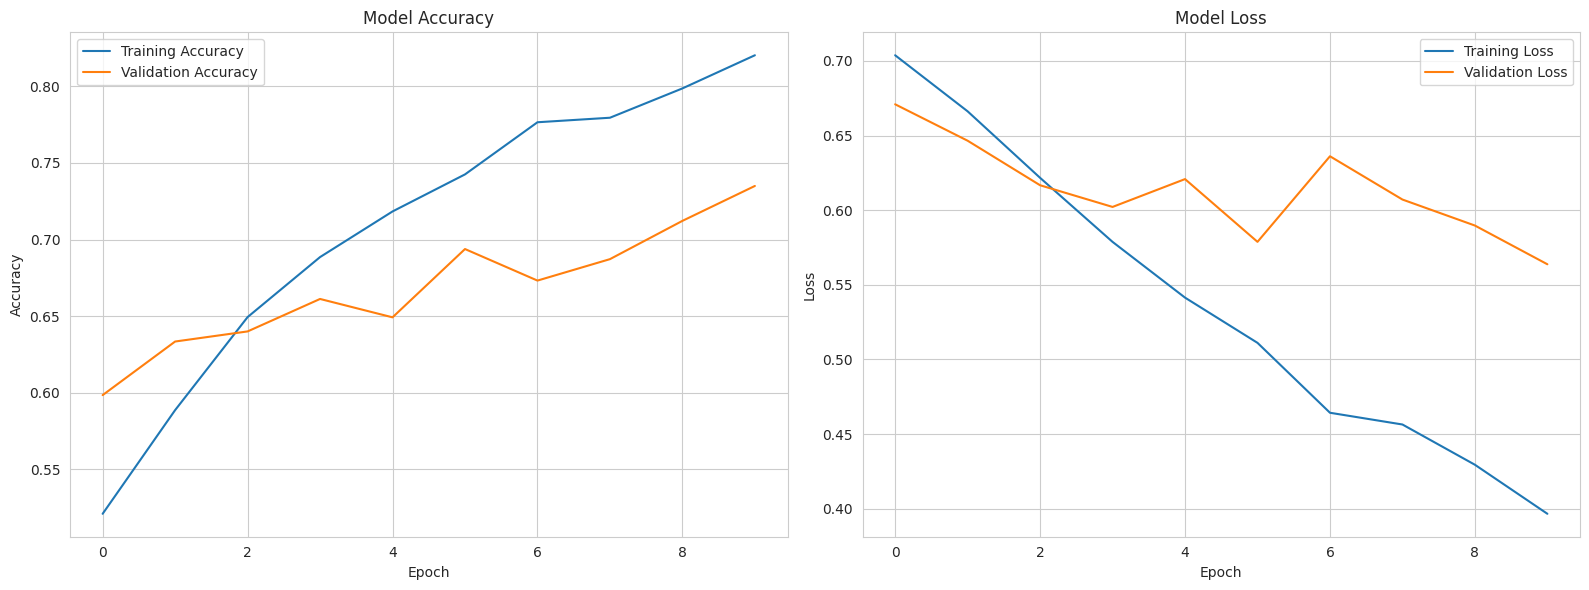

In [19]:
# Plot training history
plt.figure(figsize=(16, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Test accuracy: 0.7395
Test loss: 0.5481
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.71      0.73     12500
    Positive       0.73      0.77      0.75     12500

    accuracy                           0.74     25000
   macro avg       0.74      0.74      0.74     25000
weighted avg       0.74      0.74      0.74     25000



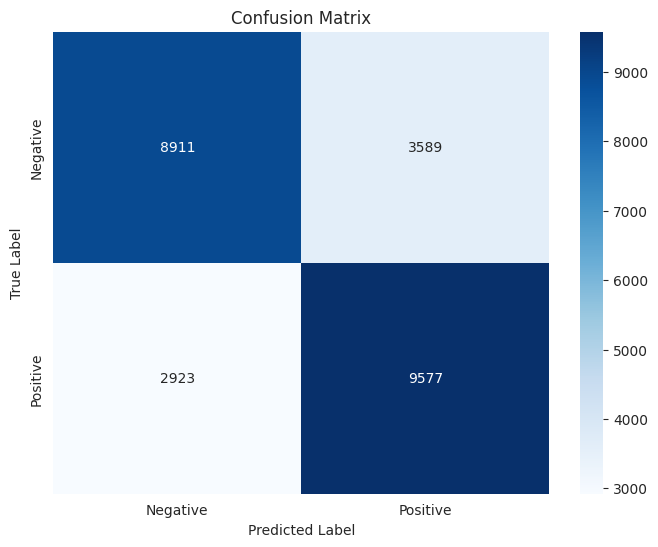

In [20]:
# Evaluate the model on the test set
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {rnn_test_acc:.4f}")
print(f"Test loss: {rnn_test_loss:.4f}")

# Make predictions
y_pred_prob = rnn_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
# Visualize predictions on sample reviews
n_samples = 5
sample_indices = np.random.choice(len(X_test), n_samples, replace=False)

print("Sample Predictions:")
for idx in sample_indices:
    review_text = decode_review(X_test[idx])
    true_sentiment = 'Positive' if y_test[idx] == 1 else 'Negative'
    pred_sentiment = 'Positive' if y_pred[idx] == 1 else 'Negative'
    confidence = y_pred_prob[idx][0] if y_pred[idx] == 1 else 1 - y_pred_prob[idx][0]

    print(f"\nReview: {review_text[:100]}...")
    print(f"True Sentiment: {true_sentiment}")
    print(f"Predicted Sentiment: {pred_sentiment} (Confidence: {confidence:.2f})")
    print("-" * 80)

Sample Predictions:

Review: goes to camp in this movie ernest jim <UNK> works as a janitor for a bank but he wants to be a bank ...
True Sentiment: Positive
Predicted Sentiment: Positive (Confidence: 0.82)
--------------------------------------------------------------------------------

Review: <START> unlike some movies which you can wonder around and do other things this movie kept me in fro...
True Sentiment: Positive
Predicted Sentiment: Positive (Confidence: 0.98)
--------------------------------------------------------------------------------

Review: <START> if your expecting jackass look somewhere else this an actual movie and for the budget well d...
True Sentiment: Positive
Predicted Sentiment: Negative (Confidence: 0.77)
--------------------------------------------------------------------------------

Review: <START> i can't believe that i actually sat thru this entire film a friend rented it because the jac...
True Sentiment: Negative
Predicted Sentiment: Negative (Confide

## Part 3: Long Short-Term Memory (LSTM) Networks

LSTM networks are a special kind of RNN designed to overcome the vanishing gradient problem, allowing them to learn long-term dependencies in sequence data.

### 3.1 Introduction to LSTMs

#### Key Components of LSTM Cells:

1. **Cell State**: Long-term memory component that runs through the entire chain
2. **Forget Gate**: Controls what information to discard from the cell state
3. **Input Gate**: Controls what new information to add to the cell state
4. **Output Gate**: Controls what parts of the cell state to output

#### Advantages of LSTMs:

- Better at capturing long-range dependencies
- More resistant to vanishing gradient problem
- More stable training compared to simple RNNs

Let's implement an LSTM model for the same sentiment analysis task and compare its performance with the simple RNN.

In [22]:
# Define an LSTM model
def create_lstm_model(max_features, maxlen, bidirectional=False):
    model = Sequential([
        # Embedding layer
        Embedding(max_features, 128, input_length=maxlen),

        # LSTM layer (optional: bidirectional)
        Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)) if bidirectional else
        LSTM(64, dropout=0.2, recurrent_dropout=0.2),

        # Output layer for binary classification
        Dense(1, activation='sigmoid')
    ])

    return model

# Create the model
lstm_model = create_lstm_model(max_features, maxlen)

# Compile the model
lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 115s 684ms/step - accuracy: 0.6723 - loss: 0.5962 - val_accuracy: 0.8042 - val_loss: 0.4253
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 106s 676ms/step - accuracy: 0.8603 - loss: 0.3478 - val_accuracy: 0.8336 - val_loss: 0.3791
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 107s 677ms/step - accuracy: 0.8860 - loss: 0.2879 - val_accuracy: 0.8228 - val_loss: 0.3945
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 142s 685ms/step - accuracy: 0.8904 - loss: 0.2746 - val_accuracy: 0.8198 - val_loss: 0.4135
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 673ms/step - accuracy: 0.9156 - loss: 0.2275 - val_accuracy: 0.8262 - val_loss: 0.4100
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [24]:
# Evaluate the LSTM model
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test accuracy: {lstm_test_acc:.4f}")
print(f"LSTM Test loss: {lstm_test_loss:.4f}")

# Compare with simple RNN
print(f"\nSimple RNN Test accuracy: {rnn_test_acc:.4f}")
print(f"Improvement with LSTM: {(lstm_test_acc - rnn_test_acc)*100:.2f}%")

LSTM Test accuracy: 0.8347
LSTM Test loss: 0.3823

Simple RNN Test accuracy: 0.7395
Improvement with LSTM: 9.52%


## Part 4: Transformers

Transformers are a type of deep learning model primarily used for NLP tasks. They rely on a mechanism called self-attention, which allows the model to weigh the importance of different words in a sequence when making predictions, regardless of their position in the sequence.

### 4.1 Introduction to Transformers

#### Key Components of Transformers:

1. **Self-Attention Mechanism**: Allows the model to consider relationships between all positions in a sequence
2. **Multi-Head Attention**: Allows the model to attend to information from different representation subspaces
3. **Positional Encoding**: Adds information about the position of tokens in the sequence
4. **Feed-Forward Networks**: Applied to each position independently

#### Advantages of Transformers:

- Highly parallelizable (unlike RNNs which are sequential)
- Excellent at capturing long-range dependencies
- State-of-the-art performance on many NLP tasks

Let's implement a simplified transformer model for sentiment analysis to compare with RNN and LSTM.

In [25]:
# Define a simplified transformer block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-head self attention
    attention_output = MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(
        inputs + attention_output
    )

    # Feed-forward network
    ffn_output = Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)
    sequence_output = LayerNormalization(epsilon=1e-6)(
        attention_output + ffn_output
    )

    return sequence_output

# Define a position embedding layer
def position_embedding(max_length, embed_dim):
    def positional_encoding(length, depth):
        positions = np.arange(length)[:, np.newaxis]  # (seq, 1)
        depths = np.arange(depth)[np.newaxis, :] / depth  # (1, depth)

        angle_rates = 1 / (10000**depths)  # (1, depth)
        angle_rads = positions * angle_rates  # (pos, depth)

        # Apply sine to even indices and cosine to odd indices
        sines = np.sin(angle_rads[:, 0::2])
        cosines = np.cos(angle_rads[:, 1::2])

        pos_encoding = np.zeros(angle_rads.shape)
        pos_encoding[:, 0::2] = sines
        pos_encoding[:, 1::2] = cosines

        return tf.cast(pos_encoding, dtype=tf.float32)

    pos_embedding = positional_encoding(max_length, embed_dim)
    return pos_embedding

# Define a transformer model for sentiment analysis
def create_transformer_model(max_features, maxlen):
    # Define hyperparameters
    embed_dim = 128  # Embedding dimension
    num_heads = 4    # Number of attention heads
    ff_dim = 128     # Hidden layer size in feed forward network
    transformer_blocks = 4  # Number of transformer blocks

    # Define inputs
    inputs = Input(shape=(maxlen,))

    # Embedding layer
    embedding_layer = Embedding(input_dim=max_features, output_dim=embed_dim)(inputs)

    # Add positional encoding (simplified approach for demonstration)
    positions = tf.range(start=0, limit=maxlen, delta=1)
    position_embeddings = Embedding(
        input_dim=maxlen, output_dim=embed_dim
    )(positions)
    x = embedding_layer + position_embeddings

    # Apply transformer blocks
    for _ in range(transformer_blocks):
        x = transformer_encoder(x, head_size=embed_dim // num_heads,
                              num_heads=num_heads, ff_dim=ff_dim, dropout=0.1)

    # Global pooling
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(20, activation="relu")(x)
    x = Dropout(0.1)(x)

    # Output layer
    outputs = Dense(1, activation="sigmoid")(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    return model

In [26]:
# Create the transformer model
try:
    transformer_model = create_transformer_model(max_features, maxlen)

    # Compile the model
    transformer_model.compile(
        optimizer=Adam(learning_rate=5e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    # Display model summary
    transformer_model.summary()

    # Train the transformer model (this may take a while)
    transformer_history = transformer_model.fit(
        X_train, y_train,
        batch_size=32,  # Smaller batch size due to higher memory requirements
        epochs=5,       # Fewer epochs for demonstration
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the transformer model
    transformer_test_loss, transformer_test_acc = transformer_model.evaluate(X_test, y_test, verbose=0)
    print(f"Transformer Test accuracy: {transformer_test_acc:.4f}")
    print(f"Transformer Test loss: {transformer_test_loss:.4f}")

    # Update model comparison
    model_comparison = pd.DataFrame({
        'Model': ['Simple RNN', 'LSTM', 'Bidirectional LSTM', 'Transformer'],
        'Test Accuracy': [rnn_test_acc, lstm_test_acc, bi_test_acc, transformer_test_acc],
        'Test Loss': [rnn_test_loss, lstm_test_loss, bi_test_loss, transformer_test_loss]
    })

    print("\nModel Comparison:")
    print(model_comparison)

    # Visualize comparison
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Test Accuracy', data=model_comparison)
    plt.title('Test Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0.75, 0.95)  # Adjust as needed
    plt.grid(True, axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error creating or training transformer model: {e}")
    print("This might be due to memory constraints or version incompatibilities.")
    print("Transformers typically require significant computational resources.")

Error creating or training transformer model: name 'GlobalAveragePooling1D' is not defined
This might be due to memory constraints or version incompatibilities.
Transformers typically require significant computational resources.


## 5. Model Applications and Use Cases

Now that we've explored different neural network architectures, let's discuss their real-world applications and appropriate use cases.

### 5.1 CNN Applications

Convolutional Neural Networks excel in tasks involving grid-like data, particularly images:

1. **Image Classification**: Identifying objects or categories in images
2. **Object Detection**: Locating and identifying multiple objects in images
3. **Segmentation**: Pixel-level classification for precise object boundaries
4. **Face Recognition**: Identifying individuals from facial features
5. **Medical Image Analysis**: Detecting anomalies in X-rays, MRIs, etc.

### 5.2 RNN and LSTM Applications

Recurrent Neural Networks and LSTMs are designed for sequential data:

1. **Natural Language Processing**: Text classification, sentiment analysis
2. **Time Series Forecasting**: Predicting stock prices, weather patterns
3. **Speech Recognition**: Converting spoken language to text
4. **Music Generation**: Creating musical sequences
5. **Anomaly Detection**: Identifying unusual patterns in time series data

### 5.3 Transformer Applications

Transformers have revolutionized many sequence processing tasks:

1. **Language Translation**: Converting text between languages
2. **Text Generation**: Creating human-like text (e.g., GPT models)
3. **Question Answering**: Extracting relevant information from context
4. **Text Summarization**: Condensing documents while preserving meaning
5. **Named Entity Recognition**: Identifying entities like people, places, organizations

### 5.4 Choosing the Right Architecture

When deciding which architecture to use, consider:

1. **Data Type**: Grid-like (CNN), sequential (RNN/LSTM/Transformer)
2. **Task Complexity**: Simpler tasks might need simpler models
3. **Sequence Length**: Long sequences favor Transformers over RNNs/LSTMs
4. **Computational Resources**: Transformers typically require more resources
5. **Training Data Size**: More complex models need more data

## 6. Conclusion

In this notebook, we've explored four powerful neural network architectures, each designed for specific types of data and tasks:

1. **Convolutional Neural Networks (CNNs)** excel at processing grid-like data such as images, automatically learning spatial hierarchies of features.

2. **Recurrent Neural Networks (RNNs)** process sequential data one element at a time, maintaining a hidden state to remember previous inputs.

3. **Long Short-Term Memory (LSTM) Networks** extend RNNs with specialized memory cells, allowing them to better learn long-range dependencies in sequential data.

4. **Transformers** use self-attention mechanisms to process all elements in a sequence simultaneously, achieving state-of-the-art performance on many sequence processing tasks.

Each architecture has its strengths and appropriate use cases. Understanding these differences helps in selecting the right tool for specific machine learning problems.

As deep learning continues to evolve, hybrid approaches and specialized architectures are emerging to tackle increasingly complex tasks. The foundations covered in this notebook provide a solid understanding of the core principles behind many of these advanced models.